# Recency Frequency Montetary Analysis

### Importing Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed_data/feature_engineered.csv')

In [11]:
df['recency'] = df['recency'] * -1

In [12]:
df.head()

,customer_id,recency,frequency,price_sum,price_mean,spend_90_total,spend_90_flag
0,1,455,1,11.77,11.770000,0.00,0.0
1,2,444,2,89.00,44.500000,0.00,0.0
2,3,127,5,139.47,27.894000,16.99,1.0
3,4,110,4,100.50,25.125000,0.00,0.0
4,5,88,11,385.61,35.055455,0.00,0.0


### Distribution of RFM Metrics

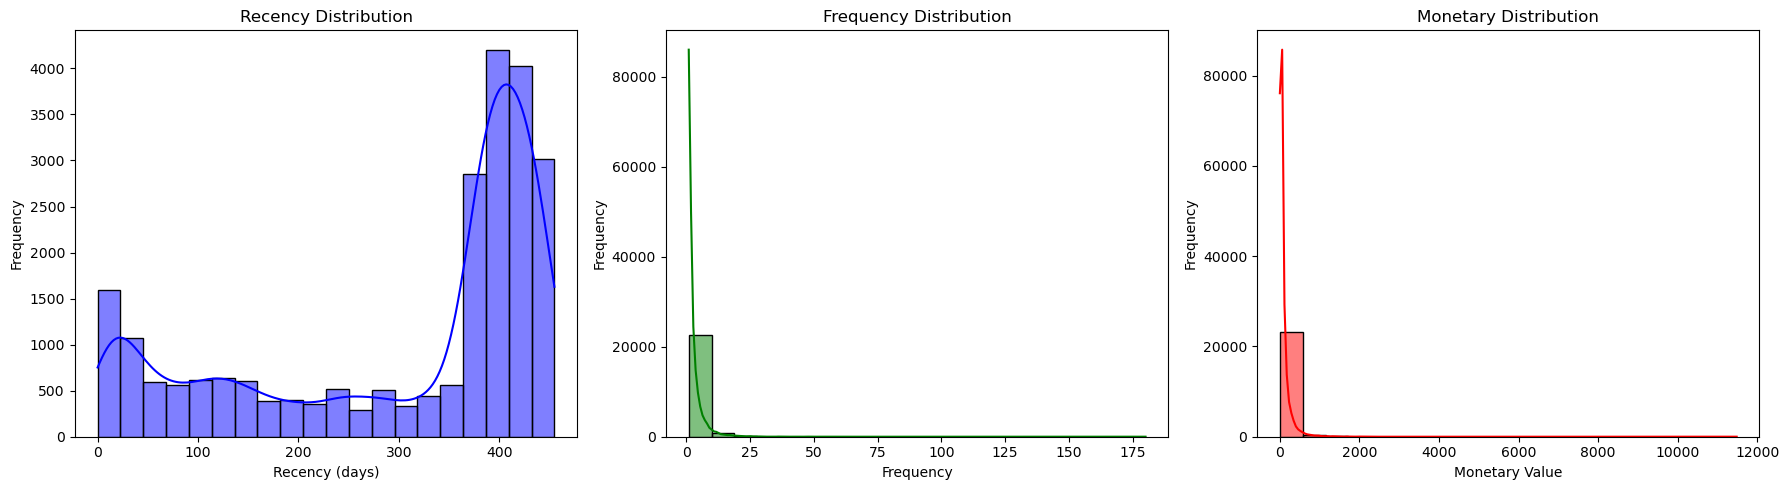

In [13]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['recency'], bins=20, kde=True, color='blue')
plt.title('Recency Distribution') 
plt.xlabel('Recency (days)') 
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['frequency'], bins=20, kde=True, color='green')
plt.title('Frequency Distribution') 
plt.xlabel('Frequency') 
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['price_sum'], bins=20, kde=True, color='red')
plt.title('Monetary Distribution') 
plt.xlabel('Monetary Value') 
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('../visuals/rfm_metrics_distribution.png')
plt.show()

### Relationship Between RFM metrics

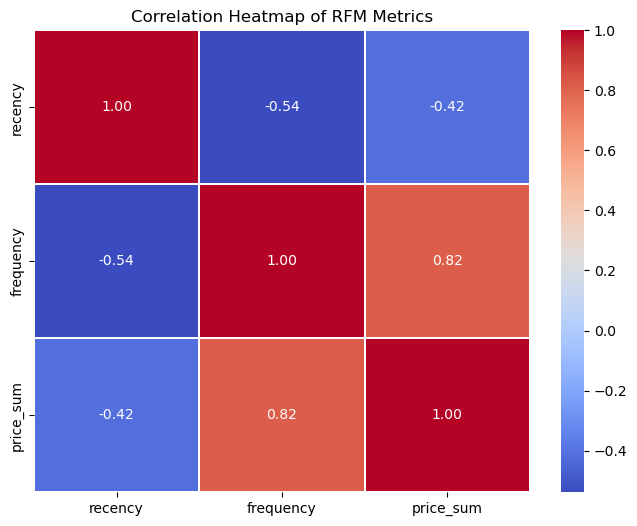

In [14]:
corr_matrix = df[['recency', 'frequency', 'price_sum']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap of RFM Metrics')
plt.savefig('../visuals/rfm_relationship_heatmap.png')
plt.show()


### Customer Spread based over Recency and Frequency

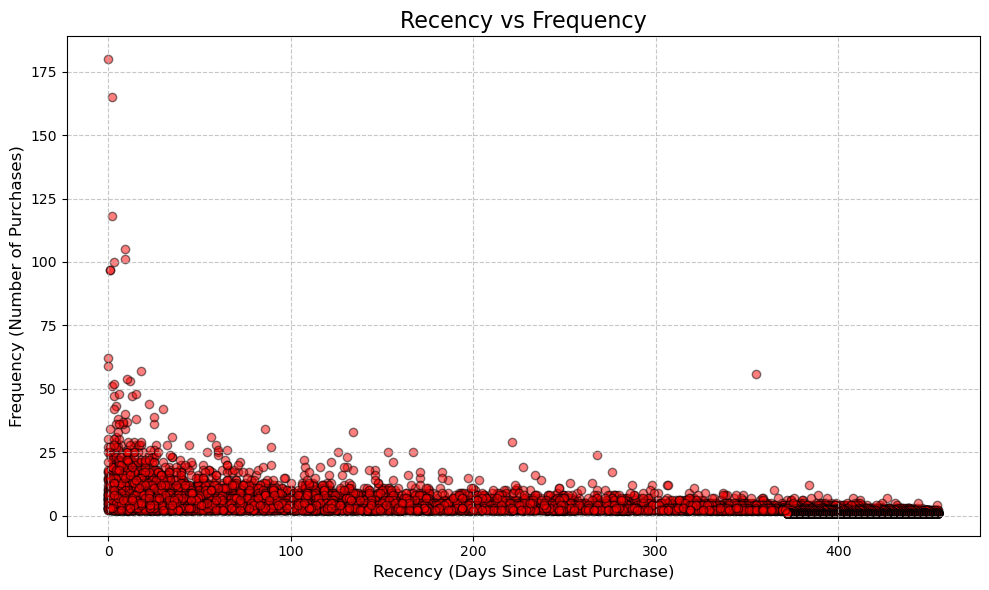

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['recency'], df['frequency'], alpha=0.5, color='red', edgecolor='black')
plt.title('Recency vs Frequency', fontsize=16)
plt.xlabel('Recency (Days Since Last Purchase)', fontsize=12)
plt.ylabel('Frequency (Number of Purchases)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../visuals/rfm_recency_vs_frequency.png')

### Customer Spread based over Monetary Value and Frequency

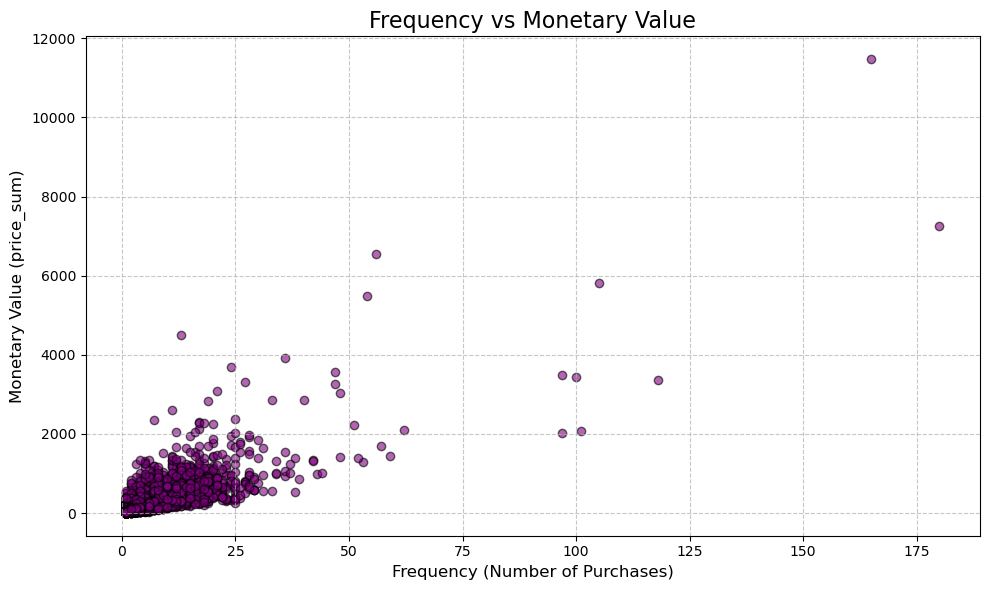

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['frequency'], df['price_sum'], alpha=0.6, color='purple', edgecolor='black')
plt.title('Frequency vs Monetary Value', fontsize=16)
plt.xlabel('Frequency (Number of Purchases)', fontsize=12)
plt.ylabel('Monetary Value (price_sum)', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../visuals/rfm_frequency_vs_monetary.png')